# Lab 2: Convolutional Neural Network 
This notebook has been prepared by Hsiu-Wen (Kelly) Chang from MINES ParisTech for the class of HPC-AI 2025


## Goal
In this lab, we will continue the same task in Lab 1 but with CNN artecture to improve the performance. This time we use pacakges from pyTorch.

### Previous in lab 1

In [19]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Hyperparameters
batch_size_train = 64 # batch size
batch_size_test = 1000
lr = 0.01 # learning rate
epochs = 10 # training epochs

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [20]:
import torch.nn.functional as F
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader

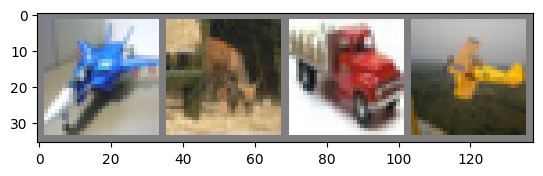

plane deer  truck plane


In [21]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

In [22]:
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

We will calculate and print the validation loss at the end of each epoch.

(Note that we always call ``model.train()`` before training, and ``model.eval()``
before inference, because these are used by layers such as ``nn.BatchNorm2d``
and ``nn.Dropout`` to ensure appropriate behaviour for these different phases.)



In [23]:
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [24]:

for epoch in range(epochs):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.166
[1,  4000] loss: 1.828
[1,  6000] loss: 1.680
[1,  8000] loss: 1.573
[1, 10000] loss: 1.505
[1, 12000] loss: 1.436
[2,  2000] loss: 1.385
[2,  4000] loss: 1.337
[2,  6000] loss: 1.312
[2,  8000] loss: 1.287
[2, 10000] loss: 1.280
[2, 12000] loss: 1.265
[3,  2000] loss: 1.182
[3,  4000] loss: 1.182
[3,  6000] loss: 1.185
[3,  8000] loss: 1.171
[3, 10000] loss: 1.178
[3, 12000] loss: 1.164
[4,  2000] loss: 1.103
[4,  4000] loss: 1.085
[4,  6000] loss: 1.091
[4,  8000] loss: 1.100
[4, 10000] loss: 1.087
[4, 12000] loss: 1.065
[5,  2000] loss: 1.000
[5,  4000] loss: 1.040
[5,  6000] loss: 1.017
[5,  8000] loss: 1.027
[5, 10000] loss: 1.034
[5, 12000] loss: 1.007
[6,  2000] loss: 0.940
[6,  4000] loss: 0.952
[6,  6000] loss: 0.944
[6,  8000] loss: 0.998
[6, 10000] loss: 0.963
[6, 12000] loss: 0.990
[7,  2000] loss: 0.901
[7,  4000] loss: 0.903
[7,  6000] loss: 0.909
[7,  8000] loss: 0.912
[7, 10000] loss: 0.967
[7, 12000] loss: 0.925
[8,  2000] loss: 0.871
[8,  4000] 

Save your model

In [25]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

Test the network on the test data

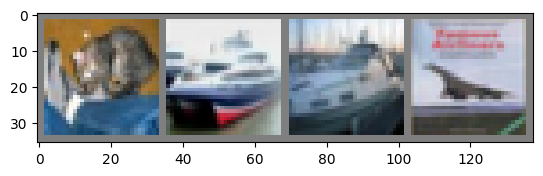

GroundTruth:  cat   ship  ship  plane


In [26]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

Now let see what is the performance on all the test data


In [27]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 63 %


Let's see how this CNN predicts all the class

In [28]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 74.4 %
Accuracy for class: car   is 84.0 %
Accuracy for class: bird  is 48.8 %
Accuracy for class: cat   is 44.5 %
Accuracy for class: deer  is 64.4 %
Accuracy for class: dog   is 50.2 %
Accuracy for class: frog  is 69.1 %
Accuracy for class: horse is 62.9 %
Accuracy for class: ship  is 75.1 %
Accuracy for class: truck is 60.9 %
